<a href="https://colab.research.google.com/github/xuejianma/LabTools/blob/master/GaussianBellShape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

layout = go.Layout(
             scene=dict(
                 aspectmode='data'
         ),
        #  paper_bgcolor= 'rgba(0,0,0,0)',
        #           plot_bgcolor= 'rgba(0,0,0,0)',
         )
theta = np.linspace(0,2*np.pi,100)
r = np.linspace(0,0.8,100)
thetaGrid,rGrid = np.meshgrid(theta,r)
xx = rGrid*np.cos(thetaGrid)
yy = rGrid*np.sin(thetaGrid)
zz = np.exp(-(xx**2+yy**2)/0.2)

fig = go.Figure(data=[go.Surface(z=zz,x=xx,y=yy,colorscale='oranges',reversescale=False,lighting=dict(diffuse=0.1,specular=0.2))],layout=layout)

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [6]:
['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd']

array([[4.13993772e-08, 2.06115362e-09, 1.38879439e-11],
       [5.10908903e-12, 2.54366565e-13, 1.71390843e-15],
       [8.53304763e-17, 4.24835426e-18, 2.86251858e-20]])

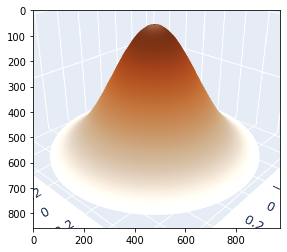

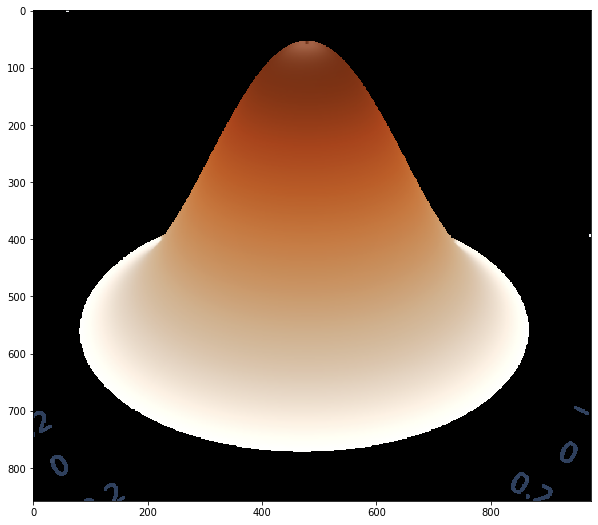

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def plotRGB(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
colors_to_delete = np.asarray([[0,0,0],[245, 236, 230]])
img = cv2.imread('imgs/bell.png')
plotRGB(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for color in colors_to_delete:
            if np.linalg.norm(img[i,j]-color) <= 20:
                img[i,j]=[0,0,0]
            if np.linalg.norm(img[i,j]-np.array([255,255,255])) <= 0:
                img[i,j]=[0,0,0]
plt.figure(figsize=(10,10))
kernel = np.ones((5,5),np.uint8)
img_new = img.copy()
img_new = cv2.erode(img_new,kernel=kernel)
# img_new = cv2.blur(img_new,ksize=(5,5))
img_new = cv2.dilate(img_new,kernel=kernel)
plotRGB(img_new)

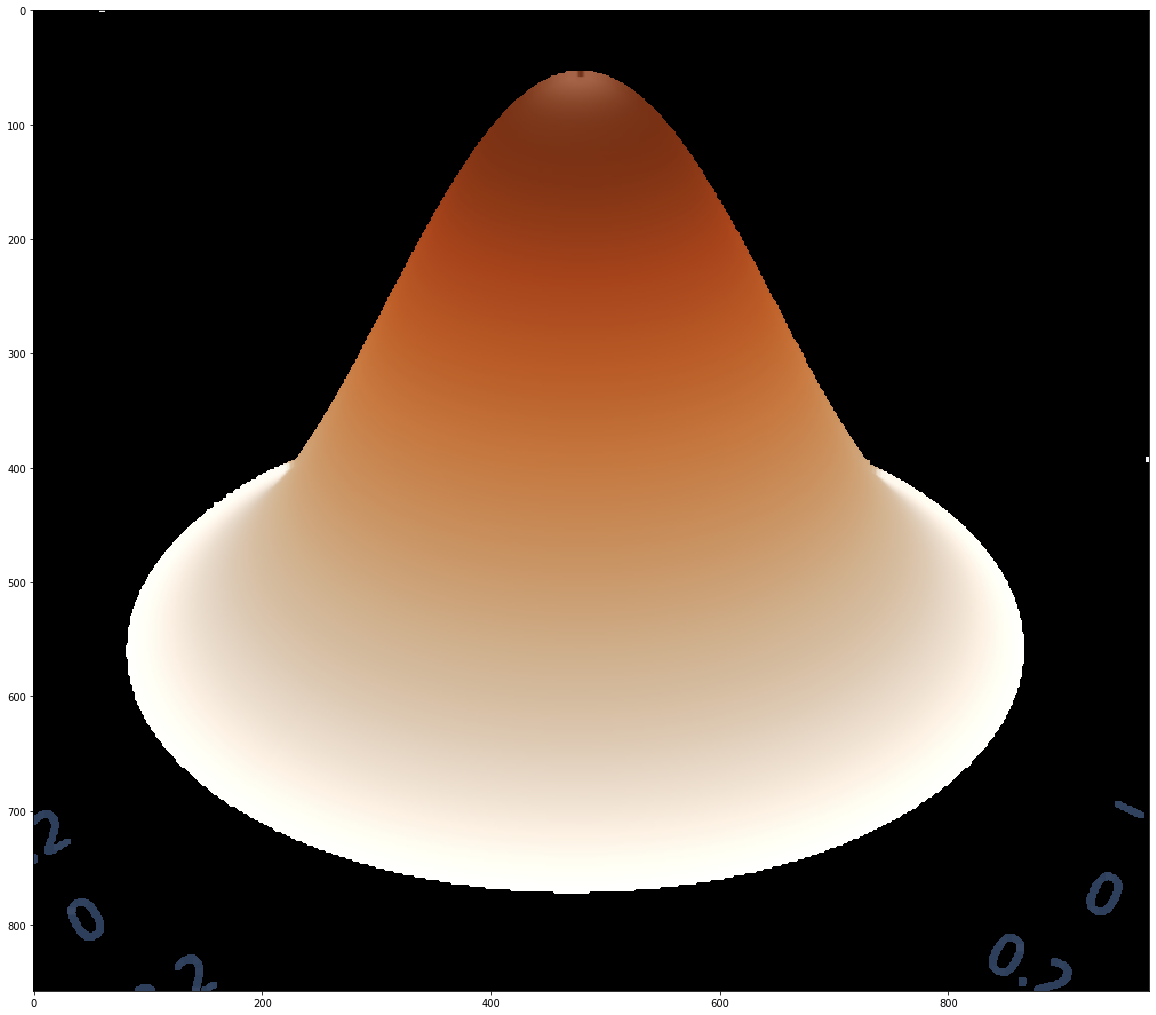

In [106]:
img_new = img.copy()
plt.figure(figsize=(20,20))

img_new = cv2.erode(img_new,kernel=kernel)
img_new = cv2.dilate(img_new,kernel=kernel)
img_new = cv2.erode(img_new,kernel=kernel)
img_new = cv2.dilate(img_new,kernel=kernel)



plotRGB(img_new)

In [32]:
np.unique(img.reshape(-1,3),axis=0)

array([[ 25,  51, 119],
       [ 26,  54, 124],
       [ 28,  60, 139],
       ...,
       [188, 176, 169],
       [189, 177, 170],
       [255, 255, 255]], dtype=uint8)

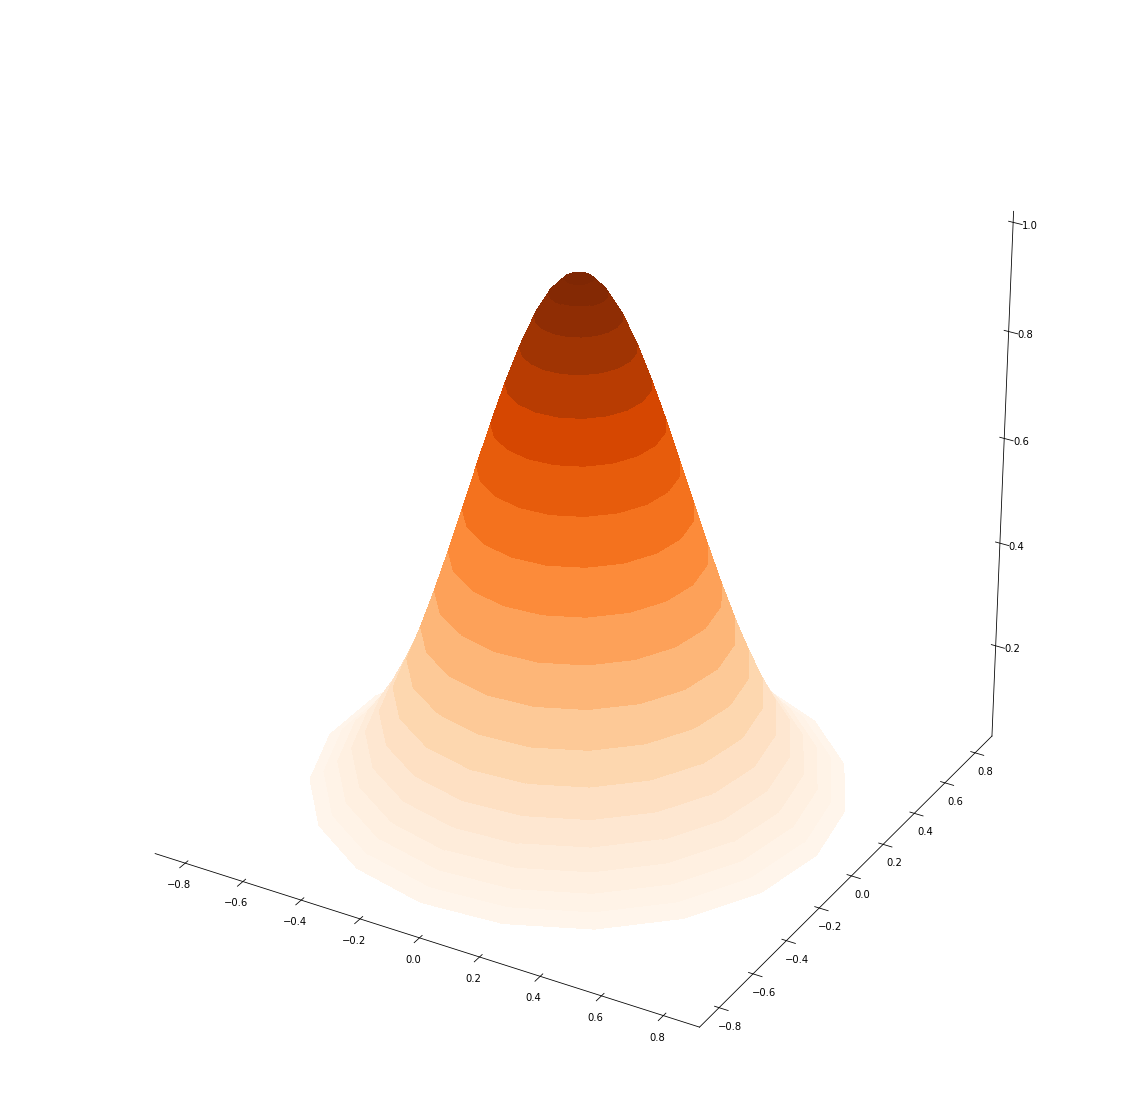

In [149]:
import numpy as np
# from mayavi import mlab
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

## Test data: Matlab `peaks()`
# x, y = np.mgrid[-3:3:150j,-3:3:150j]
# z =  3*(1 - x)**2 * np.exp(-x**2 - (y + 1)**2) \
#    - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) \
#    - 1./3*np.exp(-(x + 1)**2 - y**2) 

theta = np.linspace(0,2*np.pi,20)
r = np.linspace(0,0.8,20)
thetaGrid,rGrid = np.meshgrid(theta,r)
xx = rGrid*np.cos(thetaGrid)
yy = rGrid*np.sin(thetaGrid)
zz = np.exp(-(xx**2+yy**2)/0.2)


# ## Mayavi
# surf = mlab.surf(x, y, z, colormap='RdYlBu', warp_scale='auto')
# # Change the visualization parameters.
# surf.actor.property.interpolation = 'phong'
# surf.actor.property.specular = 0.1
# surf.actor.property.specular_power = 5



## Matplotlib
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Create light source object.
ls = LightSource(azdeg=0, altdeg=65)
# Shade data, creating an rgb array.
rgb = ls.shade(zz, plt.cm.RdYlBu)
surf = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, linewidth=0,
                       antialiased=False, cmap=plt.cm.Oranges)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# plt.figure(figsize=(20,20))
plt.show()
# mlab.show()

In [124]:
np.mgrid([1,2],[3,4])

TypeError: 'MGridClass' object is not callable

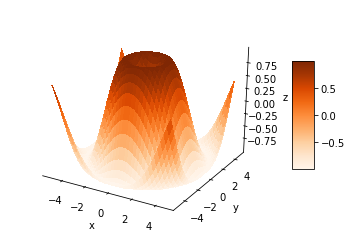

In [141]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")

x = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x,x)
Z = np.sin(np.sqrt(X**2 + Y**2))

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.Oranges,
                   linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()